<a href="https://colab.research.google.com/github/iakovkh/mypython/blob/main/LSTM_example13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 19.8684 - val_loss: 3.5393
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1449 - val_loss: 2.8367
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7127 - val_loss: 2.9155
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.7057 - val_loss: 2.7418
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.7492 - val_loss: 2.4186
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4633 - val_loss: 2.1952
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4447 - val_loss: 2.2874
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.2600 - val_loss: 2.3474
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.2050 - val_loss: 2.0993
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1415 - val_loss: 2.0324
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8207 - val_loss: 2.0880
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.8586 -

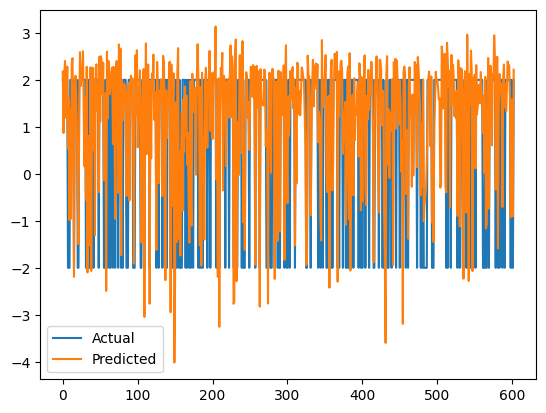

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [4]:
# Configuration Section
number_of_layers = 5
number_of_neurons = 50
optimizer = "adam"
loss_function = "mean_squared_error"
activation = 'relu'
epochs = 50
normalize_data = False  # Set to True if normalization is needed
tolerance = 0.001  # Standard default value for tolerance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Input

# Step I - General data preparation
class MyMatrix:
    def __init__(self):
        self.data = None

    # 1.12 Add a method to read data from a file
    def read_data_from_file(self, file_path):
        self.data = pd.read_excel(file_path)

    # 1.13 Add a method to normalize data
    def normalize_data(self):
        scaler = MinMaxScaler()
        self.data = pd.DataFrame(scaler.fit_transform(self.data), columns=self.data.columns)

    # 1.14 Add a method to display data in console
    def display_console(self, column=None):
        if column:
            print(self.data.iloc[:, column])
        else:
            print(self.data)

    # 1.15 Add a method to display data visually
    def display_visual(self, column=None):
        if column:
            plt.plot(self.data.iloc[:, column])
            plt.show()
        else:
            for col in self.data.columns:
                plt.figure()
                plt.plot(self.data[col])
                plt.title(f'Column {col}')
                plt.show()

# Step II - Read and prepare data
# 2.1 Create an object of MyMatrix class
MyData = MyMatrix()

# 2.2 Read the data from the file
MyData.read_data_from_file('/content/sample_data/NN.xlsx')

# 2.3 Use first 80% of the data for training and 20% for testing
train_data, test_data = train_test_split(MyData.data, test_size=0.2, random_state=42)

# 2.4 Normalize the data if required
if normalize_data:
    MyData.normalize_data()

# Step III - Design the neural network
# 3.2 Create a backpropagation neural network
model = Sequential()
model.add(Input(shape=(train_data.shape[1] - 1,)))
model.add(Dense(number_of_neurons, activation=activation))
for _ in range(number_of_layers - 2):
    model.add(Dense(number_of_neurons, activation=activation))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=optimizer, loss=loss_function)

# Separate input features and target variable
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# 3.3 Train the network
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

# Step IV - Testing results
# 4.1 Use the trained neural network to forecast values
predictions = model.predict(X_test)

# 4.2 Visualize forecasted values and compare them to actual values
plt.figure()
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

# 4.3 Read the validation file and calculate values
validation_data = pd.read_excel('/content/sample_data/NN_validate.xlsx')
validation_X = validation_data.iloc[:, 1:].values
validation_predictions = model.predict(validation_X)

# Save only the predicted values to output.xlsx
output_df = pd.DataFrame(validation_predictions, columns=['Predicted'])
output_df.to_excel('output.xlsx', index=False)
